#Library

We download some libraries that are important and necessary in out proejct

In [ ]:
import cv2
import numpy as np
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import the required libraries

# Read and write CSV files
import csv

# File and directory path manipulation
from pathlib import Path

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Image processing
import skimage.io
import skimage.transform
import skimage.exposure

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# Add comments to describe the purpose and functionality of the code

# Read and write CSV files
import csv

# File and directory path manipulation
from pathlib import Path

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Image processing
import skimage.io
import skimage.transform
import skimage.exposure

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
# Install the imageio package with pyav plugin
!pip install imageio[pyav]

#SVM Classify for binary labels



## F1-Score, Recall, Precision and some charts

Read the features from file that has uploaded before

In [ ]:
feature_path = '/content/drive/MyDrive/hog_fatures.csv'
features = []

with open(feature_path, 'r') as csv_file:
    reader = csv.reader(csv_file)
    for row in reader:
        features.append(row)

labels_binary = list(labels_binary.items())

We also read binary labels (0,1) and multi labels (0,1,2)
binary labels are used for determining which features are labeled as 'real', 'fake'

multi labels are used for determining which features are labeled as 'jungle','mountatin' or 'sea'

In [ ]:
labels_binary_path = '/content/drive/MyDrive/labels_binary.csv'

In [ ]:
labels_binary = []

with open(labels_binary_path, 'r') as csv_file:
    reader = csv.reader(csv_file)
    for row in reader:
        labels_binary.append(row)

In [ ]:
labels_multi_path = '/content/drive/MyDrive/labels_multi.csv'

In [ ]:
labels_multi = []

with open(labels_multi_path, 'r') as csv_file:
    reader = csv.reader(csv_file)
    for row in reader:
        labels_multi.append(row)

convert features and lables to array.
then we convert labels to DATAFRAME because we want to delete index column
after delete that column, we change to array again

In [ ]:
X = np.array(features)
y = np.array(labels_binary)

In [ ]:
y = pd.DataFrame(y,columns=['A','B'])
y.drop(columns=['A'],axis=1,inplace=True)

In [ ]:
y_array = y.to_numpy()

Now our data is ready for classify

we use SVM to classification

the first lables we use are those 'binray_lables'

SVM has responsible to determine which feature is fake and which one is real

we test on 30% dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_array, test_size=0.3, random_state=42)

# Create an SVM classifier
svm = SVC()

# Train the classifier
svm.fit(X_train, y_train)

# Predict the labels for test data
y_pred = svm.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.6413255360623782


Now it's time to report the accuray and other metric to know how accurate our model is

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.64      0.64       504
           1       0.65      0.64      0.64       522

    accuracy                           0.64      1026
   macro avg       0.64      0.64      0.64      1026
weighted avg       0.64      0.64      0.64      1026



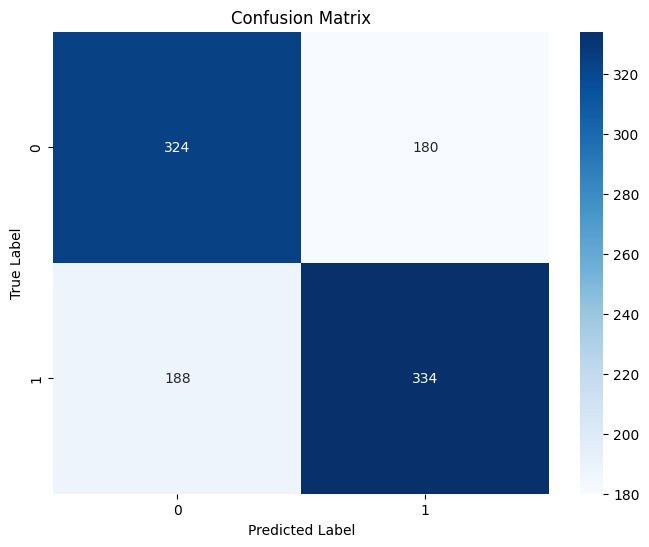

In [ ]:
report = classification_report(y_test, y_pred, labels=[0, 1])
print("Classification Report:\n", report)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

our model's accurate is 64%. we can see other metric like: f1-score, recall, precision

This code calculates and plots the Receiver Operating Characteristic (ROC) curve for evaluating the performance of a binary classification model. Here's an explanation of the steps:

1. `fpr, tpr, thresholds = roc_curve(y_test, y_pred)`: This line computes the False Positive Rate (FPR), True Positive Rate (TPR), and corresponding thresholds based on the predicted labels (`y_pred`) and the true labels (`y_test`) of the test data. The ROC curve is created by varying the classification threshold.

2. `roc_auc = auc(fpr, tpr)`: The `auc()` function from `sklearn.metrics` calculates the Area Under the ROC Curve (AUC) score, which provides a single scalar value to represent the overall performance of the model. A higher AUC score indicates better classification performance.

3. Plotting the ROC curve:
   - `plt.figure()`: Creates a new figure for the plot.
   - `plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')`: Plots the ROC curve using the FPR values on the x-axis and TPR values on the y-axis. The label includes the AUC score.
   - `plt.plot([0, 1], [0, 1], 'k--')`: Adds a dashed diagonal line representing the ROC curve of a random classifier (no skill).
   - `plt.xlim([0.0, 1.0])` and `plt.ylim([0.0, 1.05])`: Sets the limits of the x-axis and y-axis, respectively.
   - `plt.xlabel('False Positive Rate')` and `plt.ylabel('True Positive Rate')`: Adds labels to the x-axis and y-axis, respectively.
   - `plt.title('Receiver Operating Characteristic')`: Adds a title to the plot.
   - `plt.legend(loc="lower right")`: Displays the legend indicating the AUC score in the lower-right corner.
   - `plt.show()`: Shows the plot on the screen.

The ROC curve visually represents the trade-off between the true positive rate and the false positive rate for different classification thresholds. It helps assess the model's ability to distinguish between classes and choose an appropriate threshold based on the desired balance between sensitivity and specificity. The AUC score provides a summary measure of the model's performance, with a higher score indicating better discrimination.

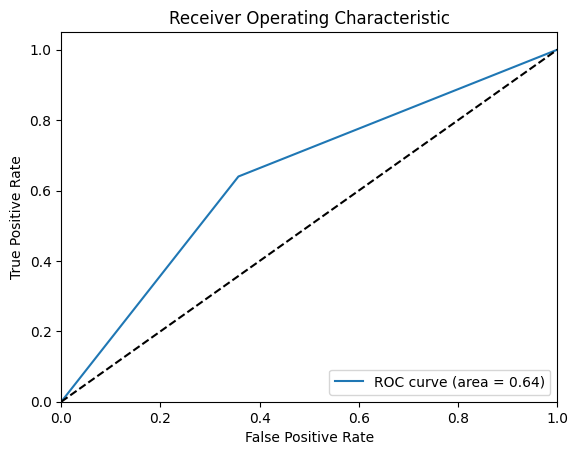

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

This code calculates and plots the Precision-Recall curve for evaluating the performance of a binary classification model. Here's an explanation of the steps:

1. `precision, recall, thresholds = precision_recall_curve(y_test, y_pred)`: This line computes the precision, recall, and corresponding thresholds based on the predicted labels (`y_pred`) and the true labels (`y_test`) of the test data. The precision-recall curve is created by varying the classification threshold.

2. `pr_auc = auc(recall, precision)`: The `auc()` function from `sklearn.metrics` calculates the Area Under the Precision-Recall Curve (PR AUC) score, which provides a single scalar value to represent the overall performance of the model in terms of precision and recall. A higher PR AUC score indicates better classification performance.

3. Plotting the Precision-Recall curve:
   - `plt.figure()`: Creates a new figure for the plot.
   - `plt.plot(recall, precision, label=f'Precision-Recall curve (area = {pr_auc:.2f})')`: Plots the Precision-Recall curve using the recall values on the x-axis and precision values on the y-axis. The label includes the PR AUC score.
   - `plt.xlim([0.0, 1.0])` and `plt.ylim([0.0, 1.05])`: Sets the limits of the x-axis and y-axis, respectively.
   - `plt.xlabel('Recall')` and `plt.ylabel('Precision')`: Adds labels to the x-axis and y-axis, respectively.
   - `plt.title('Precision-Recall Curve')`: Adds a title to the plot.
   - `plt.legend(loc="lower right")`: Displays the legend indicating the PR AUC score in the lower-right corner.
   - `plt.show()`: Shows the plot on the screen.

The Precision-Recall curve shows the trade-off between precision (positive predictive value) and recall (sensitivity) for different classification thresholds. It is particularly useful when dealing with imbalanced datasets or when the cost of false positives and false negatives differs. The PR AUC score summarizes the overall performance of the model in terms of precision and recall, with a higher score indicating better classification performance.

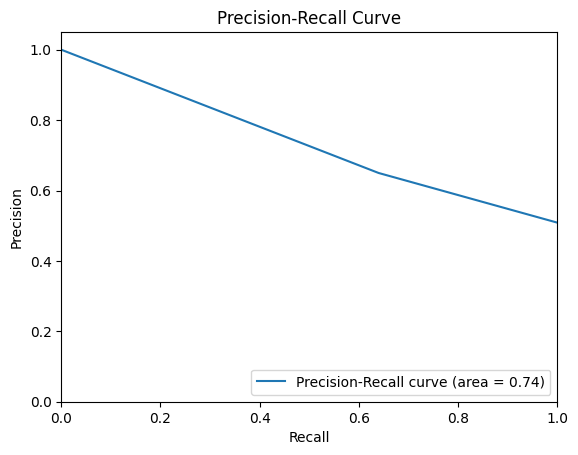

In [ ]:
# Compute precision-recall curve and AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()


This code visualizes the class distribution of a binary classification dataset using a bar chart. Here's how it works:

1. `class_labels = ['Class 0', 'Class 1']`: This line defines the class labels for the two classes in your dataset. Replace `'Class 0'` and `'Class 1'` with the actual labels corresponding to your dataset.

2. `class_counts = [len(y_train[y_train == 0]), len(y_train[y_train == 1])]`: This line calculates the number of instances for each class in the training set (`y_train`). It uses boolean indexing to filter the instances of each class (`0` and `1`) and counts the number of instances for each class. Replace `y_train` with your actual training labels.

3. `plt.bar(class_labels, class_counts)`: The `bar()` function from `matplotlib.pyplot` creates a bar chart with the class labels on the x-axis and the corresponding class counts on the y-axis. It visualizes the distribution of instances across the classes.

4. `plt.xlabel('Class')` and `plt.ylabel('Count')`: These lines add labels to the x-axis and y-axis of the plot, respectively.

5. `plt.title('Class Distribution')`: This line adds a title to the plot.

6. `plt.show()`: This command displays the plot on the screen.

By visualizing the class distribution, you can gain insights into the balance or imbalance of your dataset. It is particularly useful when dealing with imbalanced datasets, where one class may have significantly more instances than the other.

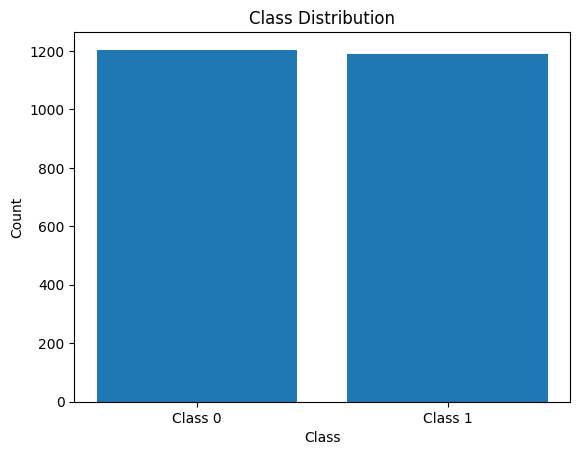

In [ ]:
class_labels = ['Class 0', 'Class 1']  # Replace with actual class labels
class_counts = [len(y_train[y_train == 0]), len(y_train[y_train == 1])]  # Replace with actual class counts

plt.bar(class_labels, class_counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

##PCA

We use pca to see if it improves the accuracy or not

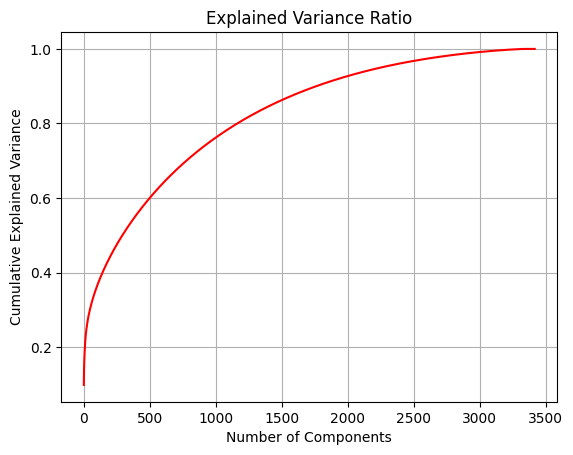

In [ ]:

# Convert the lists to NumPy arrays
X = np.array(features)
y = np.array(labels_binary)

pca = PCA()
X_pca = pca.fit_transform(X)

# Plot the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'r-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [ ]:
y = pd.DataFrame(y,columns=['A','B'])
y.drop(columns=['A'],axis=1,inplace=True)
y_array = yy.to_numpy()

We use PCA for 4 n_components: [250,500,750,1000]

after that we report accuracy for every n_components

In [ ]:
from sklearn.metrics import classification_report
from prettytable import PrettyTable

n_components_list = [250, 500, 750, 1000]

for n_components in n_components_list:
    # Apply PCA with the chosen number of components
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y_array, test_size=0.3, random_state=42)

    # Create an SVM classifier
    svm = SVC()

    # Train the classifier
    svm.fit(X_train, y_train)

    # Predict the labels for test data
    y_pred = svm.predict(X_test)

    # Calculate the accuracy, F1-score, recall, and precision
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Create a table to display the classification report
    table = PrettyTable()
    table.field_names = ['Class', 'Precision', 'Recall', 'F1-Score', 'Support']
    for class_label, metrics in report.items():
        if class_label.isdigit():
            table.add_row([
                class_label,
                round(metrics['precision'], 2),
                round(metrics['recall'], 2),
                round(metrics['f1-score'], 2),
                metrics['support']
            ])

    # Print the performance metrics
    print(f"Performance Metrics for n_components={n_components}:")
    print("Accuracy:", accuracy)
    print(table)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Performance Metrics for n_components=250:
Accuracy: 0.6530214424951267
+-------+-----------+--------+----------+---------+
| Class | Precision | Recall | F1-Score | Support |
+-------+-----------+--------+----------+---------+
|   0   |    0.66   |  0.62  |   0.64   |   504   |
|   1   |    0.65   |  0.69  |   0.67   |   522   |
+-------+-----------+--------+----------+---------+


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Performance Metrics for n_components=500:
Accuracy: 0.6500974658869396
+-------+-----------+--------+----------+---------+
| Class | Precision | Recall | F1-Score | Support |
+-------+-----------+--------+----------+---------+
|   0   |    0.65   |  0.63  |   0.64   |   504   |
|   1   |    0.65   |  0.67  |   0.66   |   522   |
+-------+-----------+--------+----------+---------+


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Performance Metrics for n_components=750:
Accuracy: 0.6461988304093568
+-------+-----------+--------+----------+---------+
| Class | Precision | Recall | F1-Score | Support |
+-------+-----------+--------+----------+---------+
|   0   |    0.64   |  0.62  |   0.63   |   504   |
|   1   |    0.65   |  0.67  |   0.66   |   522   |
+-------+-----------+--------+----------+---------+


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Performance Metrics for n_components=1000:
Accuracy: 0.6559454191033138
+-------+-----------+--------+----------+---------+
| Class | Precision | Recall | F1-Score | Support |
+-------+-----------+--------+----------+---------+
|   0   |    0.65   |  0.64  |   0.65   |   504   |
|   1   |    0.66   |  0.67  |   0.67   |   522   |
+-------+-----------+--------+----------+---------+


As seen, the best accuray that we get is 65/5% for n_components = 1000

#Classify for multi class

Now we try to use SVM for multiclass

our label is 0,1,2 so the SVM we use is OVR or one-vs-rest

In [ ]:
features = all_features
labels_multi = list(labels_multi.items())

In [ ]:
X = np.array(features)
y = np.array(labels_multi)

In [ ]:
y = pd.DataFrame(y,columns=['A','B'])
y.drop(columns=['A'],axis=1,inplace=True)
y_array = y.to_numpy()

This code performs the following steps for training and evaluating a Support Vector Machine (SVM) classifier:

1. `X_train, X_test, y_train, y_test = train_test_split(X, y_array, test_size=0.3, random_state=42)`: This line splits the dataset `X` and the corresponding labels `y_array` into training and testing sets. It randomly shuffles the data and assigns 70% of the data to the training set (`X_train`, `y_train`) and 30% to the testing set (`X_test`, `y_test`).

2. `svm = SVC(decision_function_shape='ovr')`: This line creates an instance of the SVM classifier using the `SVC` class from scikit-learn. The `decision_function_shape` parameter is set to `'ovr'`, which stands for "one-vs-rest" and indicates that the classifier will use a one-vs-rest strategy for multi-class classification.

3. `svm.fit(X_train, y_train)`: This line trains the SVM classifier on the training data. The `fit()` method learns the decision boundary based on the input features `X_train` and the corresponding labels `y_train`.

4. `y_pred = svm.predict(X_test)`: This line predicts the labels for the test data `X_test` using the trained classifier. The `predict()` method applies the learned model to classify the test instances.

5. `accuracy = accuracy_score(y_test, y_pred)`: This line calculates the accuracy of the classifier by comparing the predicted labels `y_pred` with the true labels `y_test`. The `accuracy_score()` function from scikit-learn computes the accuracy metric.

6. `print(f"Accuracy: {accuracy}")`: This line prints the calculated accuracy of the classifier on the test data.

7. `report = classification_report(y_test, y_pred)`: This line generates a classification report that includes various performance metrics such as precision, recall, F1-score, and support. The `classification_report()` function from scikit-learn computes these metrics based on the predicted labels `y_pred` and the true labels `y_test`.

8. `print("Classification Report:")` and `print(report)`: These lines print the classification report, providing detailed information about the performance of the classifier on each class.

By splitting the data into training and testing sets, training the SVM classifier, and evaluating its performance on the test data, this code provides insights into the accuracy and classification performance of the model.

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_array, test_size=0.3, random_state=42)

xsvm = SVC(decision_function_shape='ovr')

# Train the classifier
svm.fit(X_train, y_train)

# Predict the labels for test data
y_pred = svm.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8138401559454191
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       349
           1       0.83      0.87      0.85       349
           2       0.84      0.81      0.82       328

    accuracy                           0.81      1026
   macro avg       0.81      0.81      0.81      1026
weighted avg       0.81      0.81      0.81      1026



Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.77       349
           1       0.83      0.87      0.85       349
           2       0.84      0.81      0.82       328

    accuracy                           0.81      1026
   macro avg       0.81      0.81      0.81      1026
weighted avg       0.81      0.81      0.81      1026



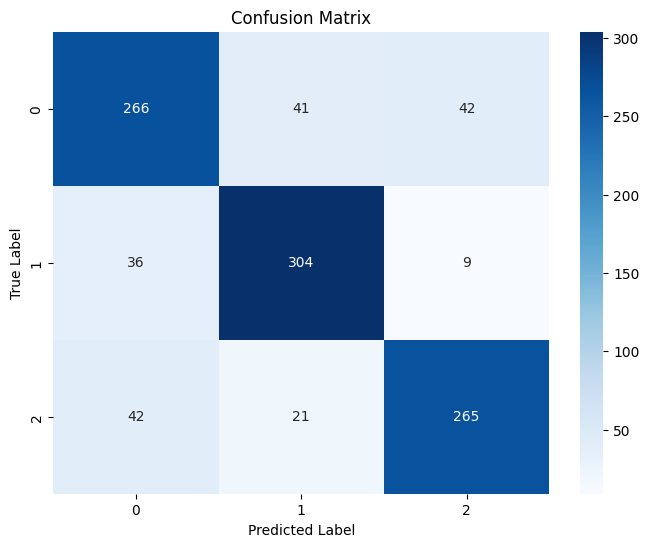

In [ ]:
report = classification_report(y_test, y_pred, labels=[0, 1,2])
print("Classification Report:\n", report)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

The accuracy we get for multiclass is 81%
that is so better in comparison to binary class

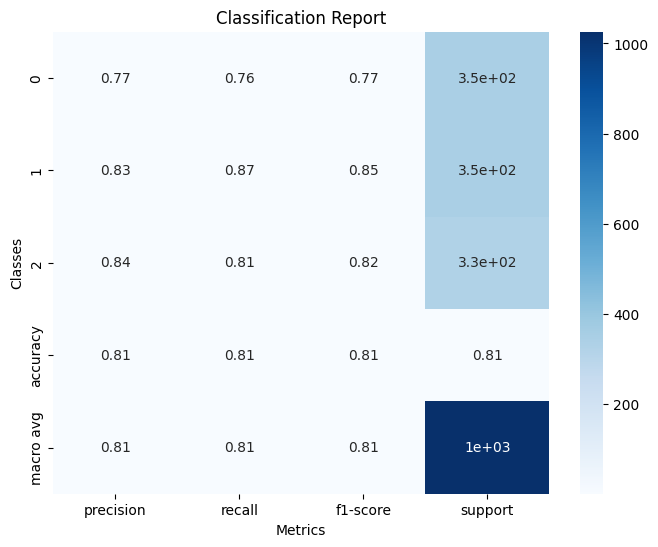

In [ ]:

# Generate the classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot the classification report as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap='Blues')
plt.title("Classification Report")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.show()


#Resnet

In [ ]:
!nvidia-smi

Sat Jul  1 21:37:16 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    33W /  70W |   4931MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

In [ ]:
print('GPU name: ', tf.config.experimental.list_physical_devices('GPU'))
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

GPU name:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs Available:  1


In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_dir = '/content/drive/MyDrive/two_classes/'

In [ ]:
# Set the input image size expected by the ResNet50 model
input_size = (224, 224)

# Set the list of class labels
class_labels = ['real', 'fake']

# Set the number of classes in the classification task
num_classes = len(class_labels)

# Set the batch size for training and validation
batch_size = 32

# Set the number of training epochs
epochs = 100

In [ ]:
# Create data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'train'),
    target_size=input_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_labels
)

Found 1912 images belonging to 2 classes.


In [ ]:
valid_datagen = ImageDataGenerator(rescale=1.0 / 255)

valid_generator = valid_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'valid'),
    target_size=input_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_labels
)

Found 484 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = valid_datagen.flow_from_directory(
os.path.join(dataset_dir, 'test'),
target_size=input_size,
batch_size=batch_size,
class_mode='categorical',
classes=class_labels
)

Found 1026 images belonging to 2 classes.


In [ ]:
# Load the pre-trained ResNet50 model without the top (fully connected) layers
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False

# Add a global average pooling layer and a dense output layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the model with the ResNet50 base and the custom top layers
model = Model(inputs=base_model.input, outputs=predictions)

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
# Freeze the weights of the ResNet50 base layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=valid_generator.n // batch_size
)

# Save the trained model
model.save('resnet50_transfer_learning.h5')

In [ ]:
test_loss, test_acc = model.evaluate_generator(test_generator)
print("Test accuracy:", test_acc)

Test accuracy:0.704155632401


#SIFT

We also try to use sift for extracting features

use its features for classfication

In [ ]:
# Import required libraries
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

In [ ]:
# Mount google drive on google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# The path that our data store in
path = '/content/drive/MyDrive/two_classes_1'

In [ ]:
# Extract features from the images
def extract_features(image_path):

    # Read image from the path
    image = cv2.imread(image_path)
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply SIFT
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    return keypoints, descriptors

In [ ]:
def build_histogram(descriptor_list, cluster_model):
    histogram = np.zeros(len(cluster_model.cluster_centers_))

    if descriptor_list is not None:
        labels = cluster_model.predict(descriptor_list.astype('double'))
        for label in labels:
            histogram[label] += 1

    return histogram

In [ ]:
# Function for classification with AdaBoost
def train_classifier(train_features, train_labels):
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(train_features)
    classifier = AdaBoostClassifier()
    classifier.fit(scaled_features, train_labels)
    return classifier

In [ ]:
def classify_images(images, classifier, cluster_model):
    predicted_labels = []
    scaler = StandardScaler()

    for image in images:
        keypoints, descriptors = extract_features(image)
        histogram = build_histogram(descriptors, cluster_model)
        scaled_features = scaler.fit_transform([histogram])
        prediction = classifier.predict(scaled_features)
        predicted_labels.append(prediction[0])

    return predicted_labels

In [ ]:
def evaluate_results(true_labels, predicted_labels):
    accuracy = accuracy_score(true_labels, predicted_labels)
    print(f"Accuracy: {accuracy}")

In [ ]:
df = pd.DataFrame(columns=['image', 'label'])

list_dir = os.listdir(path)

In [ ]:
for i in range(len(list_dir)):

      # Construct the full path to the image
      image_path = os.path.join(path, list_dir[i])

      # Determine the class of the image based on the filename
      label = 1 if list_dir[i].split('_')[0]=='fake' else 0  # Assuming the class label is the part before the first underscore

      df.loc[i, ['image', 'label']] = image_path, label

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df['image'], df['label'], test_size=0.3)

In [ ]:
# Load and preprocess your training and testing images and labels
train_images = list(x_train)  # List of training images
train_labels = list(y_train)  # List of corresponding training labels
test_images = list(x_test)   # List of testing images
test_labels = list(y_test)   # List of corresponding testing labels

In [ ]:
# Extract features from training images
train_descriptors = []
for image in train_images:
    try:
      _, descriptors = extract_features(image)
    except:
      print(image)
    if descriptors is not None:
        train_descriptors.extend(descriptors)

In [ ]:
# Perform clustering to obtain visual words
cluster_model = KMeans(n_clusters=10, n_init='auto')
cluster_model.fit(train_descriptors)

KMeans(n_clusters=10, n_init='auto')

In [ ]:
# Build histograms for training features
train_features = []
for image in train_images:
    _, descriptors = extract_features(image)
    histogram = build_histogram(descriptors, cluster_model)
    train_features.append(histogram)

In [ ]:
# Train the classifier
classifier = train_classifier(train_features, train_labels)

In [ ]:
# Extract features from testing images and perform classification
test_predicted_labels = classify_images(test_images, classifier, cluster_model)

In [ ]:
# Evaluate the results
evaluate_results(test_labels, test_predicted_labels)

Accuracy: 0.5077972709551657


In [ ]:
print(classification_report(test_labels, test_predicted_labels))

              precision    recall  f1-score   support

           0       0.51      1.00      0.67       521
           1       0.00      0.00      0.00       505

    accuracy                           0.51      1026
   macro avg       0.25      0.50      0.34      1026
weighted avg       0.26      0.51      0.34      1026



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Comparison with given features in the project file

##Resized images labels

We do the same thing

In [ ]:
features_dir = '/content/drive/MyDrive/features.csv'
binary_labels_dir = '/content/drive/MyDrive/labels_binary.csv'
multi_labels_dir = '/content/drive/MyDrive/labels_multi.csv'

In [ ]:
features = []
with open(features_dir,mode='r') as files:
    csvreader = csv.reader(files)
    for row in csvreader:
        features.append(row)



These labels were made from resized images

In [ ]:
labels_binary = []
with open(binary_labels_dir,mode='r') as label:
  file_reader = csv.reader(label)
  for row in file_reader:
    if 'Label' in row:
      continue
    labels_binary.append(row)

In [ ]:
labels_multi = []
with open(multi_labels_dir,mode='r') as label:
  file_reader = csv.reader(label)
  for row in file_reader:
    if 'Label' in row:
      continue
    labels_multi.append(row)

In [ ]:
X = np.array(features)
y = np.array(labels_binary)

In [ ]:
y = pd.DataFrame(y,columns=['A','B'])
y.drop(columns=['A'],axis=1,inplace=True)

In [ ]:
y_array = y.to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_array, test_size=0.3, random_state=42)

# Create an SVM classifier
svm = SVC()

# Train the classifier
svm.fit(X_train, y_train)

# Predict the labels for test data
y_pred = svm.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.47368421052631576


As seen, The accuracy we get is about 47/3% from given features

so the features that we get from HOG gives us 67% accuracy

/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.61      0.53       504
           1       0.48      0.35      0.40       522

   micro avg       0.47      0.47      0.47      1026
   macro avg       0.47      0.48      0.47      1026
weighted avg       0.47      0.47      0.46      1026



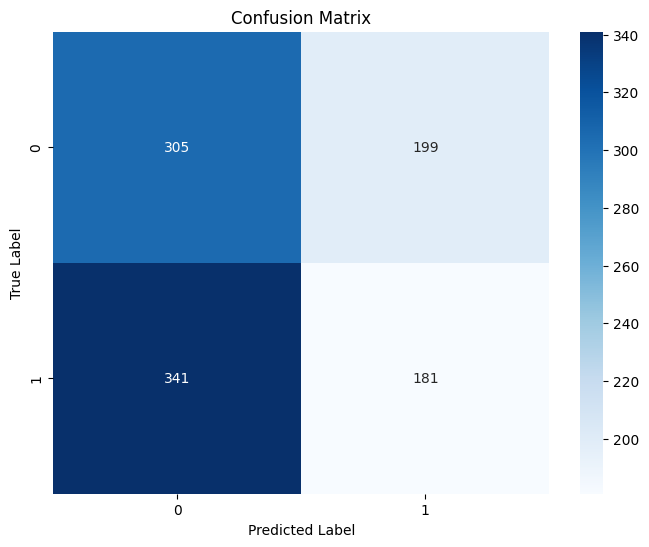

In [ ]:
report = classification_report(y_test, y_pred, labels=[0, 1])
print("Classification Report:\n", report)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

###Multi labels

In [ ]:
X = np.array(features)
y = np.array(labels_multi)

In [ ]:
y = pd.DataFrame(y,columns=['A','B'])
y.drop(columns=['A'],axis=1,inplace=True)

In [ ]:
y_array = y.to_numpy()

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_array, test_size=0.3, random_state=42)

# Create an SVM classifier with the One-vs-One approach
svm = SVC(decision_function_shape='ovr')

# Train the classifier
svm.fit(X_train, y_train)

# Predict the labels for test data
y_pred = svm.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.3235867446393762
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.31      0.33       349
           1       0.33      0.17      0.22       349
           2       0.30      0.50      0.38       328

    accuracy                           0.32      1026
   macro avg       0.33      0.33      0.31      1026
weighted avg       0.33      0.32      0.31      1026



We get accuracy with the HOG features about 81%

for given features we get 32% accuracy

/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.31      0.33       349
           1       0.33      0.17      0.22       349
           2       0.30      0.50      0.38       328

   micro avg       0.32      0.32      0.32      1026
   macro avg       0.33      0.33      0.31      1026
weighted avg       0.33      0.32      0.31      1026



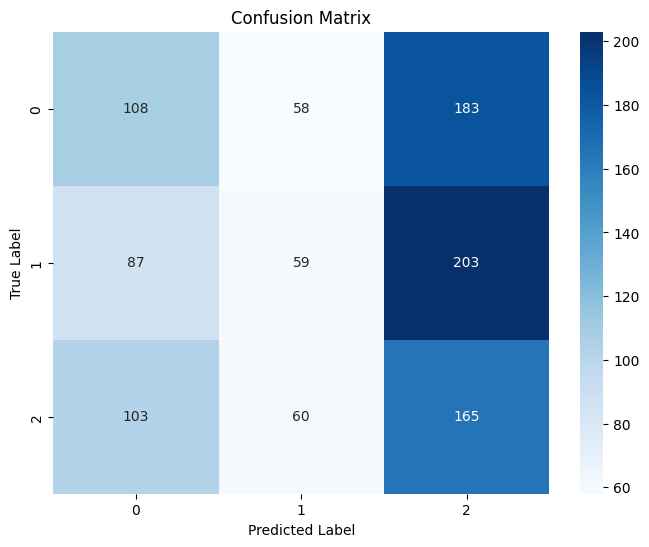

In [ ]:
report = classification_report(y_test, y_pred, labels=[0, 1,2])
print("Classification Report:\n", report)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

##Labels on original

Now we want to do the same thing

but the difference is making labels. in this part we create labels from original images (before resizing)

In [ ]:
org_dir = '/content/drive/MyDrive/orginal_image'
org_image_name = []
org_path_file = []
for file_name in os.listdir(org_dir):
  org_image_name.append(file_name)
  path = '/content/drive/MyDrive/orginal_image/'+file_name
  org_path_file.append(path)

In [ ]:
labels_binary = {}
key = 0
for name in org_image_name:
  if 'real' in name or 'Real' in name:
    labels_binary[key] = 0
  if 'fake' in name or 'Fake' in name:
    labels_binary[key] = 1
  key +=1

In [ ]:
labels_multi = {}
i = 0
for name in org_image_name:
  if 'mountain' in name or 'Mountain' in name:
    labels_multi[i] = 0
  if 'jungle' in name or 'Jungle' in name or 'forest' in name or 'junlge' in name:
    labels_multi[i] = 1
  if 'sea' in name or 'Sea' in name or 'see' in name:
    labels_multi[i] = 2
  i +=1

In [ ]:
X = np.array(features)
y = list(labels_binary.items())
y = np.array(y)

In [ ]:
y = pd.DataFrame(y,columns=['A','B'])
y.drop(columns=['A'],axis=1,inplace=True)

In [ ]:
y_array = y.to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_array, test_size=0.3, random_state=42)

# Create an SVM classifier
svm = SVC()

# Train the classifier
svm.fit(X_train, y_train)

# Predict the labels for test data
y_pred = svm.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.47953216374269003


Now the accuracy we get is about 47/9% which is a little better from resized images lables but in general it is still less than the accuracy we get from HOG features

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.59      0.53       504
           1       0.49      0.38      0.42       522

    accuracy                           0.48      1026
   macro avg       0.48      0.48      0.47      1026
weighted avg       0.48      0.48      0.47      1026



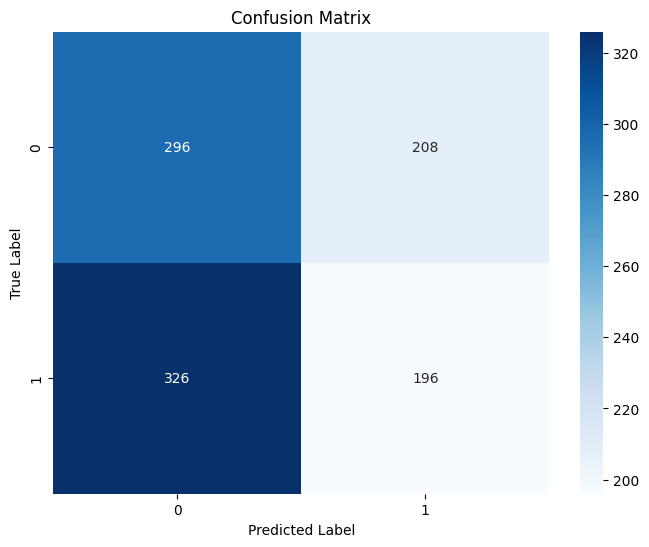

In [ ]:
report = classification_report(y_test, y_pred, labels=[0, 1])
print("Classification Report:\n", report)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

###Multi lables from original images

In [ ]:
X = np.array(features)
y = list(labels_multi.items())
y = np.array(y)

In [ ]:
y = pd.DataFrame(y,columns=['A','B'])
y.drop(columns=['A'],axis=1,inplace=True)

In [ ]:
y_array = y.to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_array, test_size=0.3, random_state=42)

# Create an SVM classifier
svm = SVC()

# Train the classifier
svm.fit(X_train, y_train)

# Predict the labels for test data
y_pred = svm.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.37524366471734893


For multi class the accuracy is better than resized images (32%), we get 37% for this but it is less than the accuracy we get from HOG features (81%)

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_array, test_size=0.3, random_state=42)

# Create an SVM classifier with the One-vs-One approach
svm = SVC(decision_function_shape='ovr')

# Train the classifier
svm.fit(X_train, y_train)

# Predict the labels for test data
y_pred = svm.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.37524366471734893
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.44      0.40       341
           1       0.39      0.38      0.39       352
           2       0.37      0.30      0.33       333

    accuracy                           0.38      1026
   macro avg       0.38      0.37      0.37      1026
weighted avg       0.38      0.38      0.37      1026



Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.44      0.40       341
           1       0.39      0.38      0.39       352
           2       0.37      0.30      0.33       333

    accuracy                           0.38      1026
   macro avg       0.38      0.37      0.37      1026
weighted avg       0.38      0.38      0.37      1026



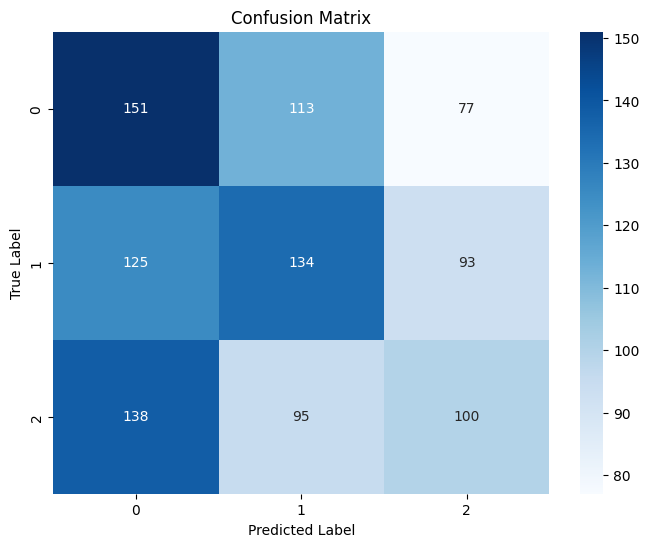

In [ ]:
report = classification_report(y_test, y_pred, labels=[0, 1,2])
print("Classification Report:\n", report)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

To result we can say our features are better than given features